In [13]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Local Search: Genetic Algorithm

## 1.Genrating Phrases

In this section we consider a toy problem: generating a target phrases (e.g. "genetic algorithm") from an initial polupation of random strings. Assume the length of the target is known.

Problem Formulation: 

1. Direct Representation: just strings.
2. Exponential Search Space: $m^l$ where $m$ is the size of the alphabet (set of characters in our interest) and $l$ is the length of the string.

Now that we want to solve it with GA:
1. Chromesome: directly use the string itself.
2. Fitness: how match/close an individual is to the target.
3. Mating: combine two strings in someway to generate a new one.

The following cells will walk you through this problem to show the basic idea of GA

In [14]:
# setting up the problem
target = 'Genetic Algorithm'
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
gene_pool = u_case + l_case + [' '] # all English chracters and white space

def init_population(pop_size, gene_pool, state_length):
    """
    Randomly initialize a population for genetic algorithm
        pop_size  :  Number of individuals in population
        gene_pool   :  List of possible values for individuals
        state_length:  The length of each individual
    """

    population = []
    for _ in range(pop_size):
        print(gene_pool)
        new_individual = "".join(random.choices(gene_pool, k=state_length))
        population.append(new_individual)

    return population

# test
init_pop = init_population(10, gene_pool, len(target))
init_pop

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', '

['xGigZfALx yOIfEvL',
 'ICXioksOkabpTkP J',
 'jjmvIZYLYHLYkIFTa',
 'puELolMHKifknDeBJ',
 'B ggBoSShQbEcYqPf',
 'CIfVyeipKnHYdCSPI',
 'LtRrVxhRjWXCuTSFW',
 'DMnOgQtFFNJarMmtI',
 'zuZfLYemygYVQjnGR',
 'RRwpFYoXJvgZNUPRA']

In [15]:
def fitness_fn(sample):
    # TODO: evaluate how close *sample* is to the target
    cnt = 0
    for i in range(len(target)):
        if sample[i] == target[i]:
            cnt += 1
    return cnt / len(target)
# test
fitness_fn(init_pop[0])

0.0

In [16]:
def select(r, population, fitness_fn):
    """
    TODO: select *r* samples from *population*
    the simplest choice is to sample from *population* with each individual weighted by its fitness
    """
    population.sort(key=fitness_fn, reverse=True)
    return population[:r]


# test
parents = select(2, init_pop, fitness_fn)
parents

['DMnOgQtFFNJarMmtI', 'RRwpFYoXJvgZNUPRA']

In [17]:
def recombine(x, y):
    """
    TODO: combine two parents to produce an offspring
    """
    str = ""
    for i in range(len(target)):
        if random.random() < 0.5:
            str += y[i]
        else:
            str += x[i]
    return str


def mutate(x, gene_pool, pmut):
    """
    apply mutation to *x* by randomly replacing one of its gene from *gene_pool*
    """
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + new_gene + x[c + 1:]

# test
child = mutate(recombine(*parents), gene_pool, 0.1)
child

'DMnOgYoFJNgaNMPtA'

In [18]:
# now refactor things into a *Problem* abstraction
# you can directly reuse what you have implemented above
from abc import ABC, abstractmethod

class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class PhraseGeneration(GAProblem):
    def __init__(self, target, alphabet):
        self.target = target
        self.alphabet = alphabet

    def init_population(self, pop_size):
        # raise NotImplementedError()
        return init_population(pop_size, self.alphabet, len(self.target))

    def fitness(self, sample):
        # TODO: evaluate how close *sample* is to the target
        cnt = 0
        for i in range(len(target)):
            if sample[i] == target[i]:
                cnt += 1
        return cnt / len(target)
    
    def reproduce(self, population, mutation_rate):
        """
        TODO: generate the next generation of population

        hint: make a new individual with 
        
        mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut)

        """
        # print(population)
        np = []
        for i in range(len(population)):
            np.append(mutate(recombine(*select(2, population, self.fitness)), self.alphabet, mutation_rate))
        return np
    
    def replacement(self, old, new):
        """
        You can use your own strategy, for example retain some solutions from the old population
        """
        return new

def genetic_algorithm(
        problem: GAProblem, 
        ngen, n_init_size, mutation_rate, 
        log_intervel=100
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best): best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")         
            history.append((gen, list(map(problem.fitness, population))))
    
    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [19]:
# now set up the parameters
ngen = 1500
max_population = 120
mutation_rate = 0.08

sid = 12111519 #TODO:  replace this with your own sid
target = f"Genetic Algorithm by {sid}" 
# alphabet = gene_pool + [chr(49), chr(50), chr(53), chr(57)] # TODO: fix this: what is the search space now?
alphabet = gene_pool + [chr(i) for i in range(48, 58)]

problem = PhraseGeneration(target, alphabet)

# and run it
solution, history = genetic_algorithm(problem, ngen, max_population, mutation_rate)
solution

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', '

'Genetic Algorithm by 12111519'

In [20]:
# visualize the evolution of the polulation
# bins = np.linspace(0, problem.max_fitness, problem.max_fitness+1)
# plot_evolution(history, bins)
# bins

## 2. N-Queens Problem

It is possible to solve the N-Queens problem with slight modifications.

For the problem:

1. Direct Representation: placement of queens.
2. Search Space: $n^n$, if we don't use any constraints.

To use GA:

Actually a new fitness function is the minimum modification you need for this problem.

Others are alomost the same as the previous problem.

In [21]:
directions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness =  n*(n-1)//2 # max number if non-attacking pairs
        self.pool = []
        for i in range(n):
            for j in range(n):
                self.pool.append((i, j))
        # print(self.pool)

    def init_population(self, pop_size):
        # TODO:alomost the same as the previous problem.
        x = [ [random.choice(self.pool) for _ in range(n)] for _ in range(pop_size) ]
        # print(x)
        return x
    
    def fitness(self, queens):
        """
        TODO

        hint: count the non-attacking pairs
        """
        ans = 0
        for i in range(len(queens)):
            for j in range(len(queens)):
                if self.not_attack(queens[i], queens[j]):
                    ans += 1
        return ans

    def not_attack(self, a, b):
        if a == b:
            return False
        i, j = a[0], a[1]
        for dx, dy in directions:
            x = i + dx
            y = j + dy
            while 0 <= x < n and 0 <= y < n:
                if (x, y) == b:
                    return False
                x = x + dx
                y = y + dy
        return True

    def vary(self, sample, mutation_rate):
        x = []
        for i in range(n):
            if random.random() < mutation_rate:
                x.append(random.choice(self.pool))
            else:
                x.append(sample[i])
        return x

    def get(self, a, b):
        x = []
        for i in range(n):
            if random.random() < 0.5:
                x.append(a[i])
            else:
                x.append(b[i])
        return x

    def reproduce(self, population, mutation_rate):
        # TODO:alomost the same as the previous problem.
        population.sort(key=self.fitness, reverse=True)
        np = []
        for i in range(len(population)):
            np.append(self.vary(self.get(population[0], population[1]), mutation_rate))
        return np




    def replacement(self, old, new):
        """
        You can use your own strategy, for example retain some solutions from the old population
        """
        return new

    def __repr__(self):
        return f"{self.n}-Queens Problem"

In [22]:
from utils import plot_NQueens
ngen = 1000
init_size = 120
mutation_rate = 0.08

n = 8
problem = NQueensProblem(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)

Generation: 0/1000,	Best: [(5, 1), (6, 6), (1, 2), (0, 7), (5, 4), (2, 0), (7, 3), (4, 4)],	Fitness=48
Generation: 100/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 200/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 300/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 400/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 500/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 600/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 700/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 800/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 7), (5, 4), (4, 1), (7, 3), (2, 0)],	Fitness=56
Generation: 900/1000,	Best: [(3, 5), (6, 6), (1, 2), (0, 

TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

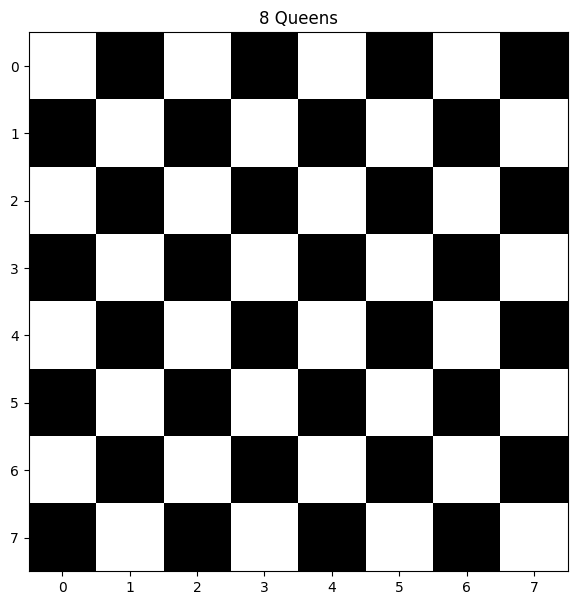

In [23]:
# Example of how to use this function
# plot_NQueens([4, 2, 0, 6, 1, 7, 5, 3])
# replace the parameter with your own results
plot_NQueens(solution)

In [ ]:
# Visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)